<a href="https://colab.research.google.com/github/LizVallejos1/Examen3_354/blob/main/Ex3_Nreinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import random
import matplotlib.pyplot as plt
import numpy as np


In [69]:
def inicializar_poblacion(tamano_poblacion, n):
    poblacion = []
    for _ in range(tamano_poblacion):
        cromosoma = [random.randint(0, n-1) for _ in range(n)]
        poblacion.append(cromosoma)#agrego cromosoma generando lista de poblacion
    return poblacion#retorno la poblacion completa en varios individuos

def calcular_fitness(cromosoma): #cro,solucion potencial al problema
    conflicts = 0
    n = len(cromosoma)
    for i in range(n):
        for j in range(i + 1, n):        #msma columna, misma diagonal
            if cromosoma[i] == cromosoma[j] or abs(cromosoma[i] - cromosoma[j]) == abs(i - j):
                conflicts += 1# si, so ++comflictos #verifica si hay conflicto entre 2 reinas
    return conflicts

In [73]:
def seleccion_padres(poblacion, tamano_torneo):
    padres = []
    for _ in range(len(poblacion)):
        torneo = random.sample(poblacion, tamano_torneo)
        mejor_padre = min(torneo, key=lambda x: calcular_fitness(x))
        padres.append(mejor_padre)
    return padres

def cruzar(padre1, padre2):
    punto_cruce = random.randint(1, len(padre1) - 1)
    hijo1 = padre1[:punto_cruce] + padre2[punto_cruce:]
    hijo2 = padre2[:punto_cruce] + padre1[punto_cruce:]
    return hijo1, hijo2

def mutar(cromosoma, tasa_mutacion):
    for i in range(len(cromosoma)):
        if random.random() < tasa_mutacion:
            cromosoma[i] = random.randint(0, len(cromosoma) - 1)
    return cromosoma


def dibujar_tablero(solucion):
    n = len(solucion)
    tablero = np.zeros((n, n))

    for i, j in enumerate(solucion):
        tablero[i, j] = 1

    plt.imshow(tablero, cmap='Blues', interpolation='none')
    plt.xticks(range(n), [str(i) for i in range(1, n + 1)])
    plt.yticks(range(n), [str(i) for i in range(1, n + 1)])
    plt.show()


def algoritmo_genetico(n, tamano_poblacion, tamano_torneo, tasa_mutacion, generaciones_limite):
    poblacion = inicializar_poblacion(tamano_poblacion, n)

    for generacion in range(generaciones_limite):  #bucleprincipal
        poblacion.sort(key=lambda x: calcular_fitness(x)) #ordeno,verifico si find pobacion optima
        mejor_cromosoma = poblacion[0]
        mejor_fitness = calcular_fitness(mejor_cromosoma)

        if mejor_fitness == 0:
            print(f'Solución encontrada en la generación {generacion}:\n{mejor_cromosoma}')
            return mejor_cromosoma

        padres = seleccion_padres(poblacion, tamano_torneo)
        nueva_poblacion = []
         # creacion de una nuevva poblacion mediante cruzmiento y mmutacion
        for i in range(0, tamano_poblacion, 2):
            padre1, padre2 = random.choice(padres), random.choice(padres)
            hijo1, hijo2 = cruzar(padre1, padre2)
            hijo1 = mutar(hijo1, tasa_mutacion)
            hijo2 = mutar(hijo2, tasa_mutacion)
            nueva_poblacion.extend([hijo1, hijo2])
          #actualizo poblacion
        poblacion = nueva_poblacion

    print(f'No se encontró una solución después de {generaciones_limite} generaciones.')
    return []


In [74]:
# Parámetros
n_reinas = 8 # pongo 8 reinas
tamano_poblacion = 100
tamano_torneo = 5
tasa_mutacion = 0.2 #mutaccion al 20 %
generaciones_limite = 1000

Solución encontrada en la generación 26:
[2, 7, 3, 6, 0, 5, 1, 4]


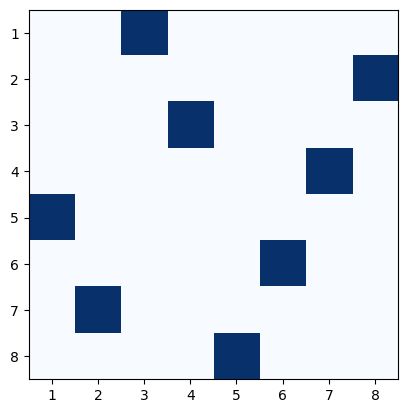

In [75]:
# Ejecutar el algoritmo genético y obtener la solución final
solucion_final = algoritmo_genetico(n_reinas, tamano_poblacion, tamano_torneo, tasa_mutacion, generaciones_limite)

# Visualizar el tablero con la solución final
if solucion_final:
    dibujar_tablero(solucion_final)